start: 2020/05/08 01:40:20
score[000]: 0.00444406231776906
score[001]: 0.004211362966619947
score[002]: 0.004013441234718362
score[003]: 0.004963994422025442
score[004]: 0.0039296767638531405
score[005]: 0.004258704460879614
score[006]: 0.00499108710519458
score[007]: 0.004281007588880392
score[008]: 0.004580568242629313
score[009]: 0.0040308681213604425
score[010]: 0.004455606257664835
score[011]: 0.004052105135102346
score[012]: 0.0033704339400517647
score[013]: 0.004752045837861041
score[014]: 0.0030172561663002195
score[015]: 0.003834179327533605
score[016]: 0.0045410987948387715
score[017]: 0.004870572457708944
score[018]: 0.0051623967444044405
score[019]: 0.004254079914432385
score[020]: 0.004532632598213349
score[021]: 0.004528367826487134
score[022]: 0.004562476168984864
score[023]: 0.004060689128605133
score[024]: 0.004826567909308355
score[025]: 0.005011801232535973
score[026]: 0.004316259606747752
score[027]: 0.003930310610785859
score[028]: 0.003978382507435652
score[029]: 

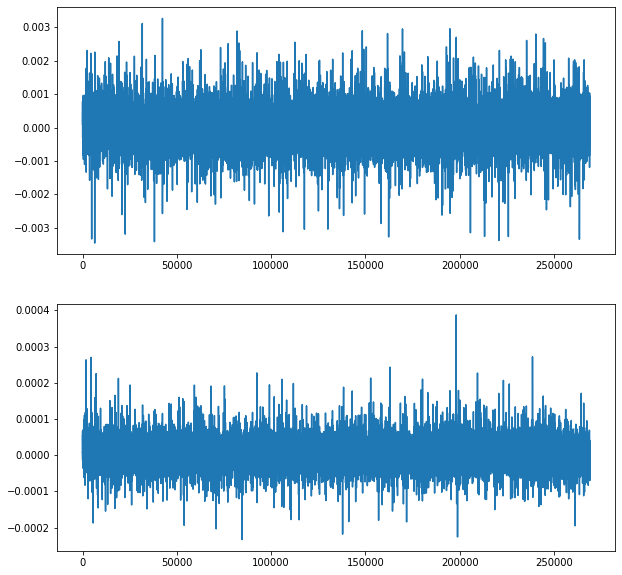

end: 2020/05/08 01:42:29


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(x, y_result, y_predict):
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_v7"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    # 最後20%のデータでテスト
    test_start = int(len(csv) * 0.8)
    csv = csv[:test_start]

    print(f"score[avg]: {bitcoin.calc_avg_score(csv)}")
    (
        data_train,
        data_test,
        label_train,
        label_test,
    ) = bitcoin.set_train_test_dataset(csv, 0.2)
    model = bitcoin.create_model(data_train, label_train)

    x = data_test#[-3500:]
    y_result = list(label_test)#[-3500:]
    y_predict = list(model.predict(x))
    plot(x, y_result, y_predict)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()